In [205]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [206]:
data=pd.read_csv('googleplaystore.csv')

In [207]:
data.shape

(10841, 13)

In [208]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [209]:
#Drop records with nulls in any of the columns. 
data.dropna(inplace=True)

In [210]:
data.shape

(9360, 13)

In [211]:
#Variables seem to have incorrect type and inconsistent formatting. You need to fix them:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [212]:
data['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [213]:
#function to change m to k
def func(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else:
        return None

In [214]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [215]:
data['Size']=data['Size'].map(func)

In [216]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [217]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
data['Reviews']=data['Reviews'].astype('int')

In [218]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [219]:
#Installs field is currently stored as string and has values like 1,000,000+. 
#Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer
data['Installs']=data['Installs'].str.replace('[+,]','')

C:\Users\user\AppData\Local\Temp\ipykernel_1560\928015740.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs']=data['Installs'].str.replace('[+,]','')


In [220]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [221]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [222]:
data['Installs']=data['Installs'].astype('int')

In [223]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [224]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
data['Price']=data['Price'].str.replace('$','')

C:\Users\user\AppData\Local\Temp\ipykernel_1560\3744476267.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price']=data['Price'].str.replace('$','')


In [226]:
data['Price']=data['Price'].astype('float')

data["Price"] = data["Price"].astype(int)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [227]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int32  
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   int32  
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 914.1+ KB


(9360, 13)

In [35]:
#Sanity checks
#Average rating should be between 1 and 5 as only these values are allowed on the play store. 
#Drop the rows that have a value outside this range.
#Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [228]:
((data['Reviews'] < 1) & (data['Reviews'] > 5 )).value_counts()

False    9360
Name: Reviews, dtype: int64

In [229]:
data.drop(data[(data['Reviews'] < 1) & (data['Reviews'] > 5 )].index, inplace = True)

In [230]:
data.shape

(9360, 13)

In [231]:
((data['Reviews']) < (data['Installs'])).value_counts()

True     9351
False       9
dtype: int64

In [232]:
data.shape

(9360, 13)

In [233]:
data.drop(data[data['Installs'] < data['Reviews'] ].index, inplace = True)

In [234]:
data.shape

(9353, 13)

In [235]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
data.drop(data[(data['Type'] =='Free') & (data['Price'] > 0 )].index, inplace = True)

In [236]:
data.shape

(9353, 13)

In [86]:
#Performing univariate analysis: 
#Boxplot for Price
#Are there any outliers? Think about the price of usual apps on Play Store.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

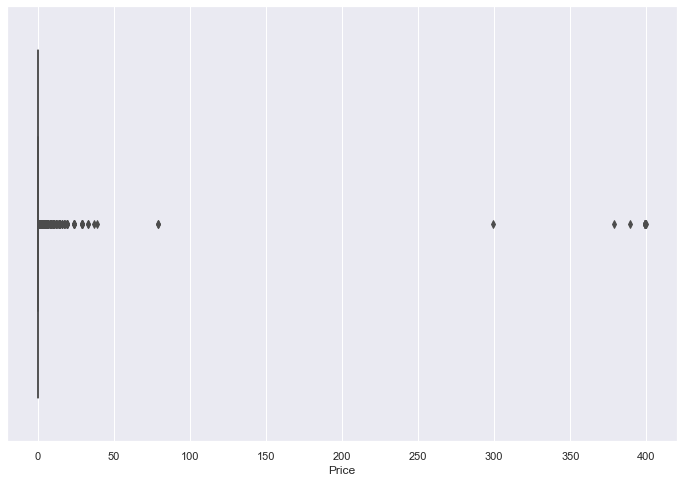

In [237]:
sns.boxplot(data['Price'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

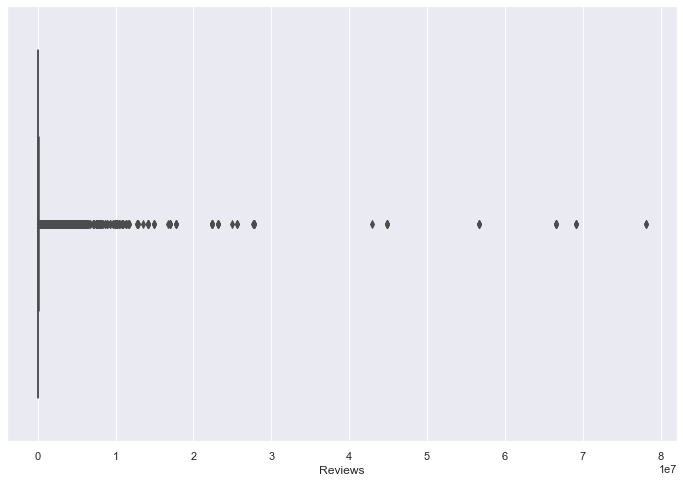

In [238]:
#Boxplot for Reviews
sns.boxplot(data['Reviews'])

<AxesSubplot:xlabel='Rating', ylabel='Count'>

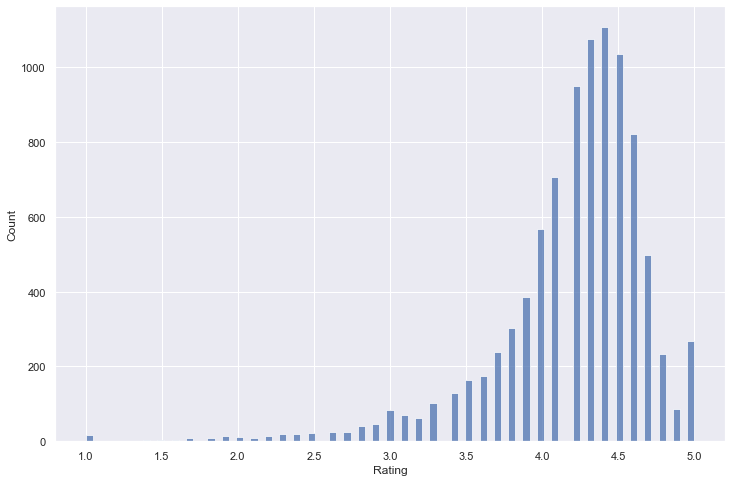

In [239]:
sns.histplot(data['Rating'])

<AxesSubplot:xlabel='Size', ylabel='Count'>

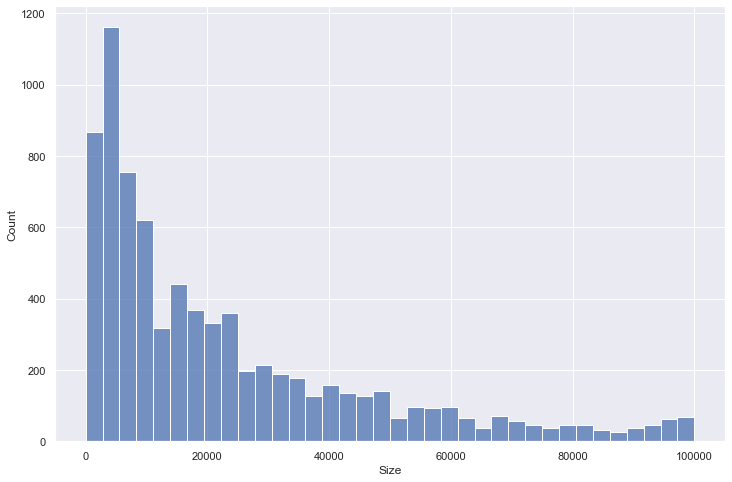

In [240]:
#Histogram for Size
sns.histplot(data['Size'])

#Outlier treatment
Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
Check out the records with very high price
Is 200 indeed a high price?
Drop these as most seem to be junk apps

In [241]:
data.drop(data[data['Price'] > 200].index, inplace = True)

In [242]:
data.shape

(9338, 13)

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [243]:
data.drop(data[data['Reviews'] > 2000000].index, inplace = True)

In [244]:
data.shape

(8885, 13)

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
Decide a threshold as cutoff for outlier and drop records having values more than that

In [245]:
data.quantile([0.1, 0.25, 0.5, 0.70, 0.90, 0.95, 0.99])

,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,2500.0,1000.0,0.0
0.25,4.0,159.00,5100.0,10000.0,0.0
0.50,4.3,4290.00,14000.0,500000.0,0.0
0.70,4.5,35930.40,26000.0,1000000.0,0.0
0.90,4.7,296771.00,56000.0,10000000.0,0.0
0.95,4.8,637298.00,72900.0,10000000.0,1.0
0.99,5.0,1462800.88,96000.0,100000000.0,7.0


In [246]:
#drop records more than 10000000 value
data.drop(data[data['Installs'] > 10000000].index, inplace = True)

In [247]:
data.shape

(8496, 13)

Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Price'>

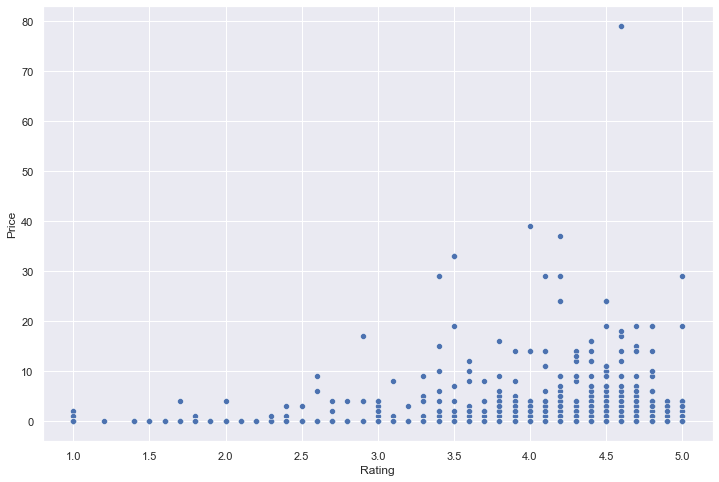

In [248]:
#Make scatter plot/joinplot for Rating vs. Price
sns.scatterplot('Rating','Price',data=data)

yes rating increases with price

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Size'>

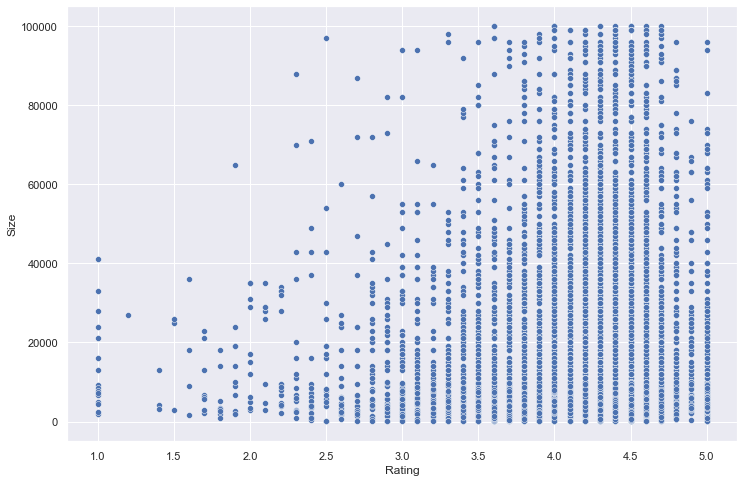

In [249]:
#Make scatter plot/joinplot for Rating vs. Size
sns.scatterplot('Rating','Size',data=data)

Yes heavior apps are rated better.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

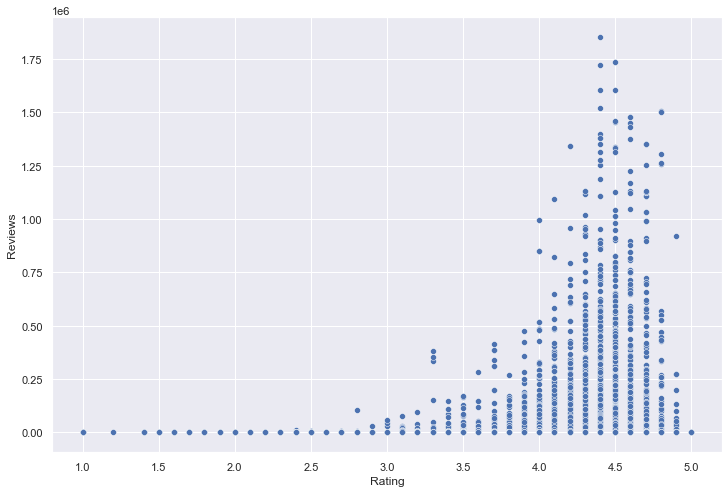

In [250]:
#Make scatter plot/joinplot for Rating vs. Reviews
#Does more review mean a better rating always
sns.scatterplot('Rating','Reviews',data=data)

yes more reviews makes app rating better.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

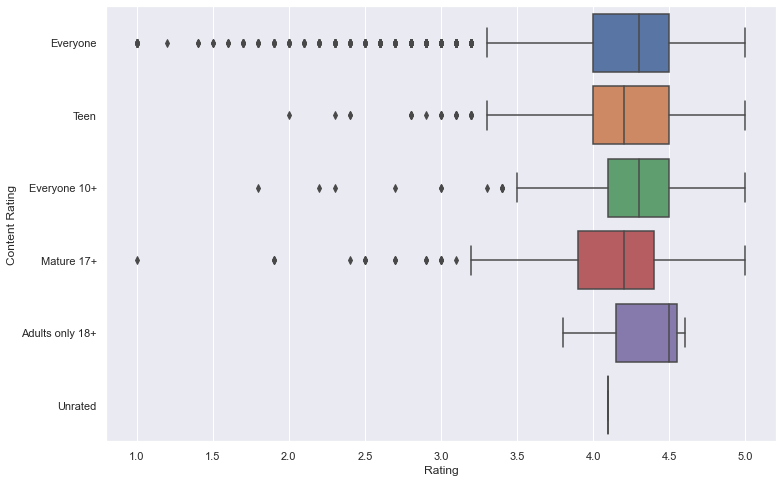

In [251]:
#Make boxplot for Rating vs. Content Rating
sns.boxplot('Rating','Content Rating',data=data)

Apps for everyone has more bad ratings compared to others as it has so much outliers value, while 18+ apps have better ratings.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Category'>

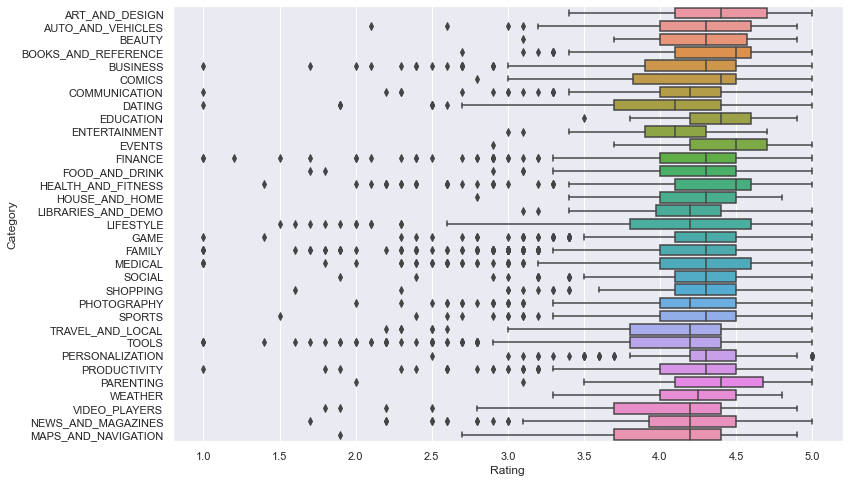

In [253]:
#Make boxplot for Ratings vs. Category
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot('Rating','Category',data=data)

Events has best ratings compare to others.

#Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [254]:
inp1 = data.copy()

In [255]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [256]:
inp1.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_1560\3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.749753
Reviews      4.576494
Size         1.533259
Installs     1.543697
Price       18.074542
dtype: float64

In [257]:
reviewskew = np.log1p(inp1['Reviews'])
reviewskew

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8496, dtype: float64

In [258]:
reviewskew.skew()

-0.20039949659264134

In [259]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs']

0           10000
1          500000
2         5000000
4          100000
5           50000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8496, dtype: int32

In [260]:
installsskew.skew()

-0.5097286542754812

In [261]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [262]:
#Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [327]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,5600.0,50000,0,Everyone,Art & Design


In [328]:
inp1.shape

(8496, 8)

In [130]:
#Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [329]:
inp2 = inp1

In [330]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,5600.0,50000,0,Everyone,Art & Design


In [331]:
#get unique values in Column "Category"
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [332]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000.0,10000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,500000,0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,5000000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,100000,0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,5600.0,50000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [333]:
inp2.shape

(8496, 40)

In [334]:
#get unique values in Column "Genres"
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [335]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]

In [336]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [337]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [338]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,159,19000.0,10000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,500000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,5000000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,100000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,5600.0,50000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
inp2.shape

(8496, 91)

In [340]:
#get unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [341]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000.0,10000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000.0,500000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700.0,5000000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967,2800.0,100000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,167,5600.0,50000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [358]:
inp2.shape

(8496, 96)

In [364]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [ ]:
d1 = inp2
X = d1.drop('Rating',axis=1)
y = d1['Rating']

Xtrain, Xtest, ytrain, ytest = tts(X,y, test_size=0.3, random_state=5)

In [ ]:
reg_all = LR()
reg_all.fit(Xtrain,ytrain)

LinearRegression()

In [ ]:
R2_train = round(reg_all.score(Xtrain,ytrain),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.074

In [ ]:
R2_test = round(reg_all.score(Xtest,ytest),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.063